In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('/content/combined_social_data_features.csv')

In [25]:
df

,account_name,caption,comment_count,share_count,like_count,platform,hashtags,mentions,engagement_score,caption_length,word_count,sentiment_score,hashtag_count,mention_count
0,McDonald's,SWIPE TO SEE WHAT PRIZES ARE LEFT!!! IT’S NOT ...,128,31,299,Facebook,NaN,NaN,458,149,29,0.303516,0,0
1,McDonald's,6 episodes\n25 Grimace family members\n1 wacky...,413,59,462,Facebook,NaN,NaN,934,92,16,0.425000,0,0
2,McDonald's,my dms can rest now,612,33,393,Facebook,NaN,NaN,1038,19,5,0.000000,0,0
3,McDonald's,MONOPOLY IS BACK AT McD’S! AVAILABLE ALL DAY! ...,1781,792,2677,Facebook,NaN,NaN,5250,122,23,0.195833,0,0
4,McDonald's,it all started with a McDonald's napkin... a s...,271,71,363,Facebook,NaN,NaN,705,117,19,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,gucci,"Attending the premiere for THE TIGER in Milan,...",461,0,35299,Instagram,"['#GucciTheTiger', '#GucciLaFamiglia', '#MFW']","['@alanabc', '@biancahuisman_', '@alexconsani'...",35760,250,36,0.200000,3,18
1792,gucci,Not all answers float to the top.\n\nWatch THE...,234,0,51340,Instagram,"['#GucciTheTiger', '#GucciLaFamiglia', '#MFW']","['@keke', '@halinareijn', '@elliotpage']",51574,111,17,0.500000,3,3
1793,gucci,THE TIGER\n\nA short film by Spike Jonze and H...,1026,0,100009,Instagram,"['#GucciTheTiger', '#GucciLaFamiglia', '#MFW']","['@demimoore', '@halinareijn', '@elliotpage', ...",101035,325,46,0.000000,3,4
1794,gucci,What do you do if you’re in a room with a tige...,354,0,32990,Instagram,"['#GucciTheTiger', '#GucciLaFamiglia', '#MFW']","['@keke', '@demimoore', '@kendalljenner', '@ha...",33344,202,36,0.200000,3,8


In [26]:
df.isnull().sum()

,0
account_name,0
caption,0
comment_count,0
share_count,0
like_count,0
platform,0
hashtags,1044
mentions,1044
engagement_score,0
caption_length,0


In [27]:
df = df.drop(['share_count', 'mentions', 'hashtags','engagement_score','hashtag_count','mention_count'], axis=1)

In [28]:
df["engagement_score"]=df["like_count"]+df["comment_count"]


In [29]:
df

,account_name,caption,comment_count,like_count,platform,caption_length,word_count,sentiment_score,engagement_score
0,McDonald's,SWIPE TO SEE WHAT PRIZES ARE LEFT!!! IT’S NOT ...,128,299,Facebook,149,29,0.303516,427
1,McDonald's,6 episodes\n25 Grimace family members\n1 wacky...,413,462,Facebook,92,16,0.425000,875
2,McDonald's,my dms can rest now,612,393,Facebook,19,5,0.000000,1005
3,McDonald's,MONOPOLY IS BACK AT McD’S! AVAILABLE ALL DAY! ...,1781,2677,Facebook,122,23,0.195833,4458
4,McDonald's,it all started with a McDonald's napkin... a s...,271,363,Facebook,117,19,0.000000,634
...,...,...,...,...,...,...,...,...,...
1791,gucci,"Attending the premiere for THE TIGER in Milan,...",461,35299,Instagram,250,36,0.200000,35760
1792,gucci,Not all answers float to the top.\n\nWatch THE...,234,51340,Instagram,111,17,0.500000,51574
1793,gucci,THE TIGER\n\nA short film by Spike Jonze and H...,1026,100009,Instagram,325,46,0.000000,101035
1794,gucci,What do you do if you’re in a room with a tige...,354,32990,Instagram,202,36,0.200000,33344


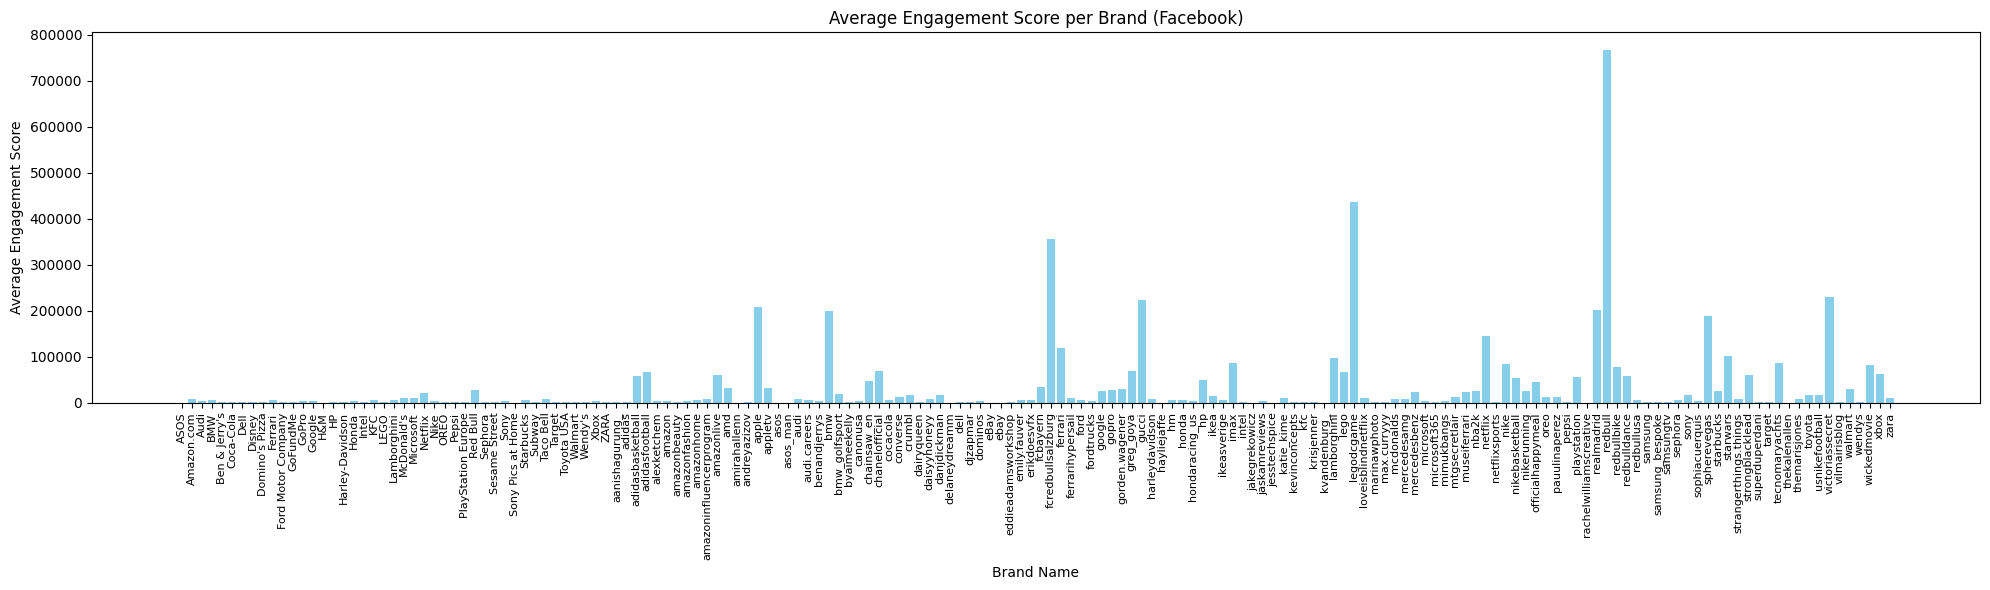

In [30]:
brand_engagement = df.groupby('account_name')['engagement_score'].mean().reset_index()

# Plot
plt.figure(figsize=(20,6))  # wider figure for more labels
plt.bar(brand_engagement['account_name'], brand_engagement['engagement_score'], color='skyblue')

plt.xlabel('Brand Name')
plt.ylabel('Average Engagement Score')
plt.title('Average Engagement Score per Brand (Facebook)')
plt.xticks(rotation=90, fontsize=8)  # rotate and shrink font
plt.tight_layout()
plt.show()

In [31]:
lower_power=df['engagement_score'].quantile(0.25)
uper_power=df['engagement_score'].quantile(0.75)
iqr=uper_power-lower_power

In [32]:
upper_limit=uper_power+1.5*iqr
lower_limit=lower_power-1.5*iqr

**now we will chk is iqr triming or iqr capping working good on outlyers **

In [33]:
#using iqr triming
df_trimmed = df[
    (df['engagement_score'] > lower_limit) &
    (df['engagement_score'] < upper_limit)
]

/tmp/ipython-input-2173630704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['engagement_score'])
/tmp/ipython-input-2173630704.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trimmed['engagement_score'])


<Axes: ylabel='engagement_score'>

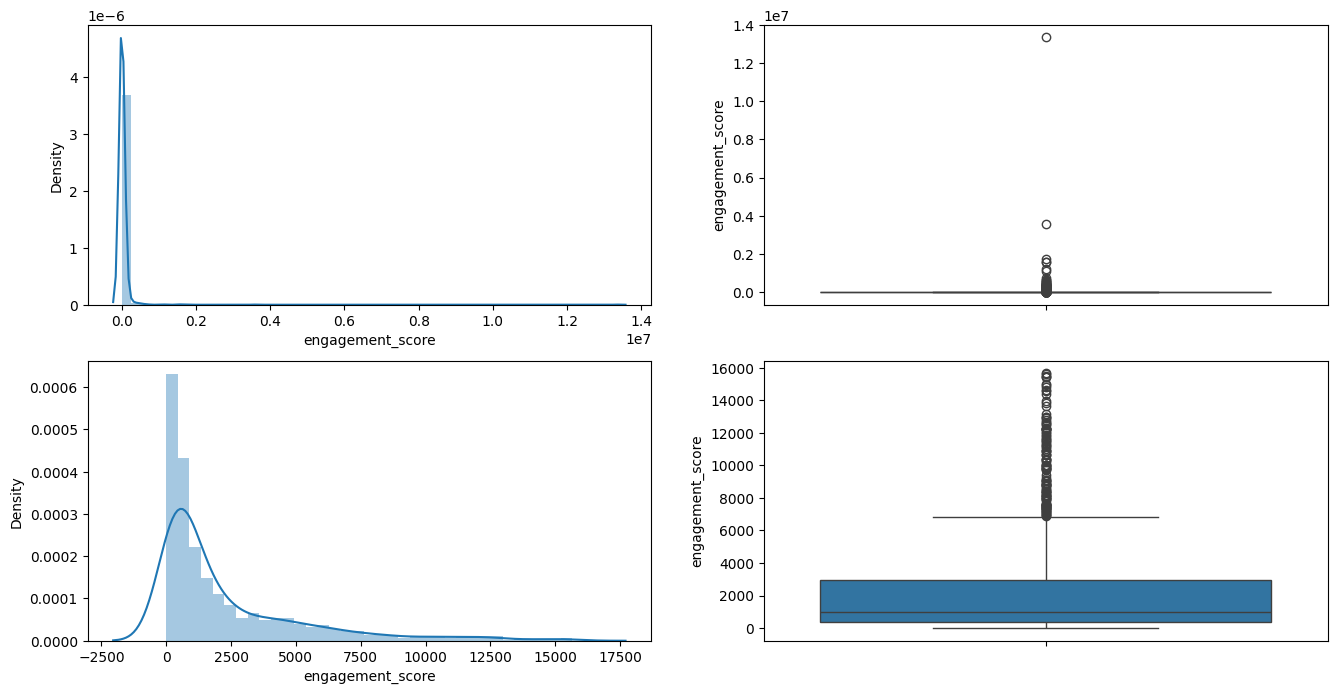

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['engagement_score'])

plt.subplot(2,2,2)
sns.boxplot(df['engagement_score'])

plt.subplot(2,2,3)
sns.distplot(df_trimmed['engagement_score'])

plt.subplot(2,2,4)
sns.boxplot(df_trimmed['engagement_score'])

In [35]:
#using iqr capping method
new_df_cap=df.copy()
new_df_cap['engagement_score']=np.where(
    new_df_cap['engagement_score']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['engagement_score']<lower_limit,
        lower_limit,
        new_df_cap['engagement_score']
    )

)


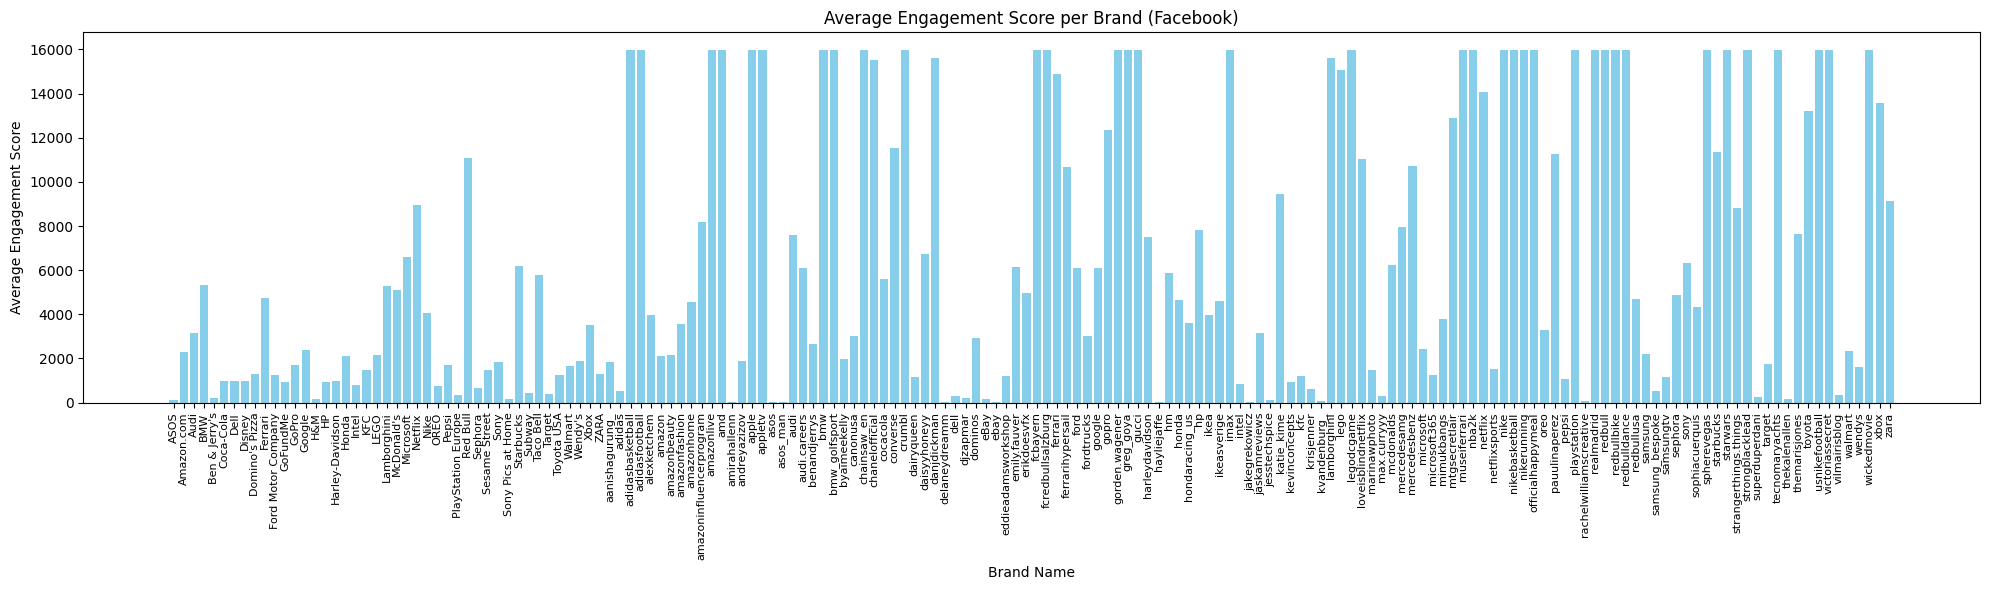

In [36]:
brand_engagement = new_df_cap.groupby('account_name')['engagement_score'].mean().reset_index()

# Plot
plt.figure(figsize=(20,6))  # wider figure for more labels
plt.bar(brand_engagement['account_name'], brand_engagement['engagement_score'], color='skyblue')

plt.xlabel('Brand Name')
plt.ylabel('Average Engagement Score')
plt.title('Average Engagement Score per Brand (Facebook)')
plt.xticks(rotation=90, fontsize=8)  # rotate and shrink font
plt.tight_layout()
plt.show()

/tmp/ipython-input-196828629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['engagement_score'])
/tmp/ipython-input-196828629.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['engagement_score'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7dfe9ab04200>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfe9ab04d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfe98bd9ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfe9ab043b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfe9ab05b20>],
 'means': []}

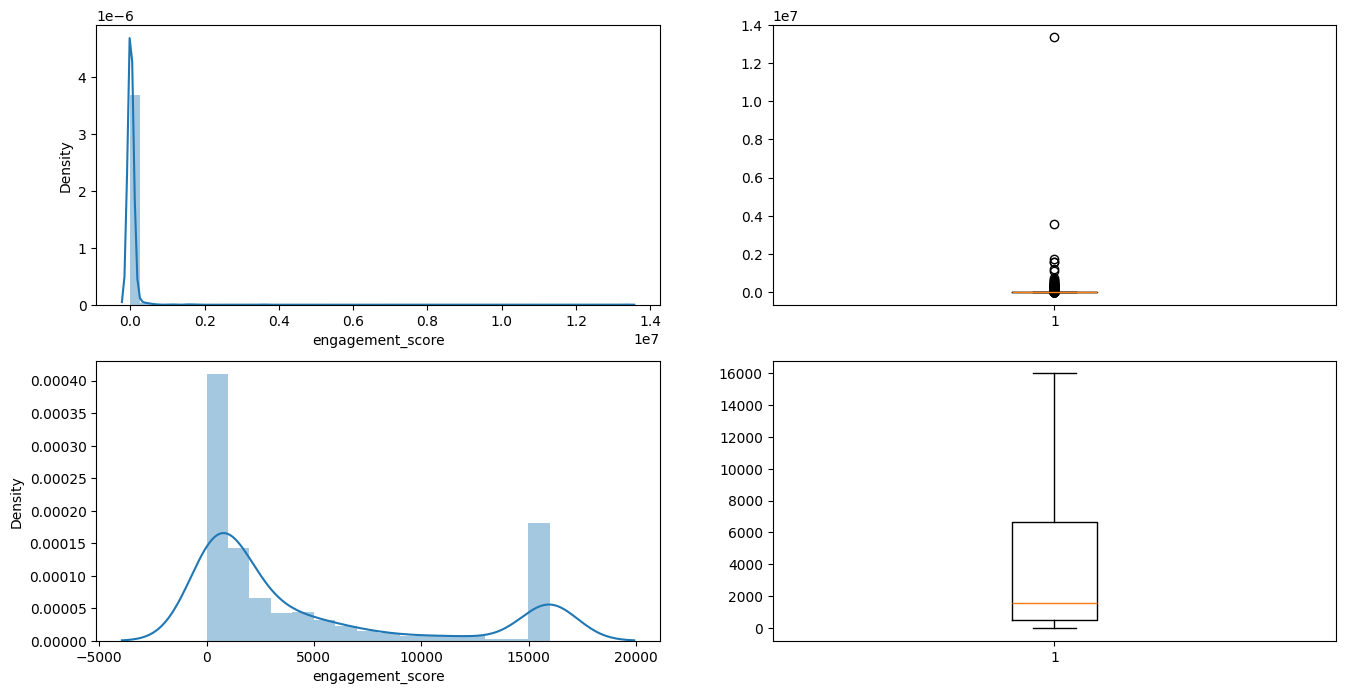

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['engagement_score'])
plt.subplot(2,2,2)
plt.boxplot(df['engagement_score'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['engagement_score'])
plt.subplot(2,2,4)
plt.boxplot(new_df_cap['engagement_score'])

In [38]:
new_df_cap.dtypes

,0
account_name,object
caption,object
comment_count,int64
like_count,int64
platform,object
caption_length,int64
word_count,int64
sentiment_score,float64
engagement_score,float64


In [39]:
df.isnull().sum()

,0
account_name,0
caption,0
comment_count,0
like_count,0
platform,0
caption_length,0
word_count,0
sentiment_score,0
engagement_score,0


,0
0,False
1,False
2,False
3,False
4,False
...,...
1791,False
1792,False
1793,False
1794,False
